# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [3]:
df=pd.read_csv('/content/Nigeria_1997-2024_Sep20_cleaned.csv')

In [4]:
df.sample(10)

,event_date,year,disorder_type,event_type,sub_event_type,actor1,inter1,civilian_targeting,admin1,admin2,location,latitude,longitude,fatalities
33590,2013-03-03,2013,Political violence,Battles,Armed clash,Police Forces of Nigeria (1999-2015),1,Unknown,Borno,Magumeri,Gajigana,12.1943,13.1017,1
19225,2020-10-05,2020,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Nigeria),3,Civilian targeting,Benue,Makurdi,Makurdi,7.7411,8.5121,0
27444,2017-05-20,2017,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,NDA: Niger Delta Avengers,3,Unknown,Delta,Warri South,Warri,5.5167,5.7500,0
22622,2019-10-02,2019,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Unknown,Adamawa,Yola-North,Yola,9.2000,12.4833,0
4970,2023-10-23,2023,Political violence,Violence against civilians,Abduction/forced disappearance,Unidentified Armed Group (Nigeria),3,Civilian targeting,Delta,Sapele,Sapele,5.8941,5.6767,0
24137,2019-02-14,2019,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Nigeria),3,Civilian targeting,Niger,Shiroro,Dabaya,9.8293,6.7662,0
22020,2020-01-03,2020,Political violence,Violence against civilians,Attack,Military Forces of Nigeria (2015-2023),1,Civilian targeting,Borno,Konduga,Bukarti,11.8477,12.9245,0
24086,2019-02-19,2019,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Nigeria),3,Civilian targeting,Imo,Ngor Okpala,Umuohiagu,5.4028,7.1997,1
34977,2011-01-17,2011,Political violence,Violence against civilians,Attack,Christian Militia (Nigeria),4,Civilian targeting,Plateau,Jos North,Jos,9.9285,8.8921,1
12089,2022-04-11,2022,Political violence,Violence against civilians,Abduction/forced disappearance,Unidentified Armed Group (Nigeria),3,Civilian targeting,Rivers,Degema,Degema,4.7461,6.7677,0


In [5]:
#Check number unique values of each column
df.nunique()

,0
event_date,6513
year,28
disorder_type,4
event_type,6
sub_event_type,24
actor1,881
inter1,8
civilian_targeting,2
admin1,37
admin2,751


##  Distribution of Event Types


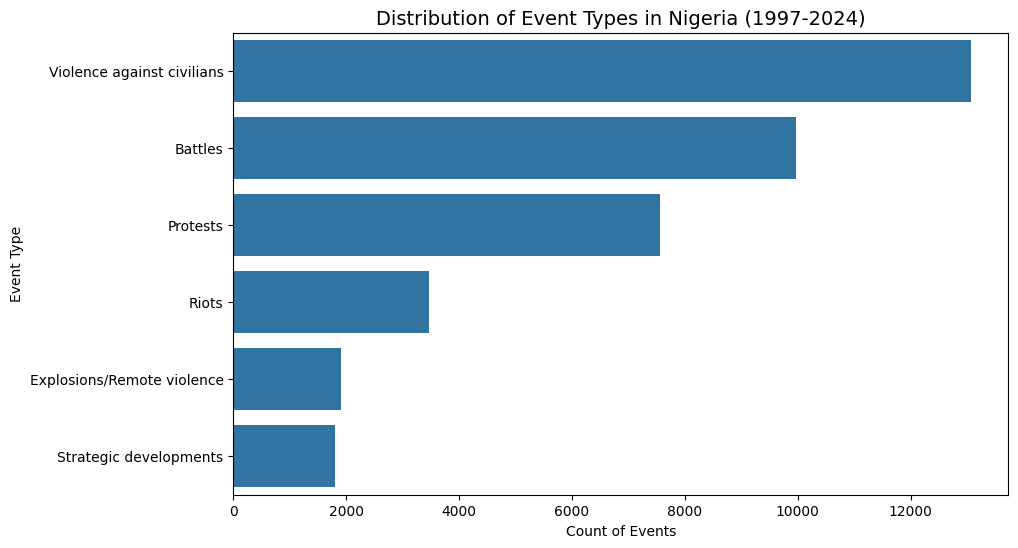

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(y='event_type', data=df, order=df['event_type'].value_counts().index)
plt.title('Distribution of Event Types in Nigeria (1997-2024)', fontsize=14)
plt.xlabel('Count of Events')
plt.ylabel('Event Type')
plt.show()

Violence against civilians and battles are the primary causes of death, accounting for nearly 50,000 fatalities each. Explosions and remote violence contribute significantly to the death toll, reaching around 20,000. Riots, while still violent, result in fewer deaths. Protests and strategic developments have negligible impact on the overall fatality count. This data highlights a severe concentration of violence-driven deaths, primarily due to direct combat and civilian targeting.






##  Fatalities by Event Type

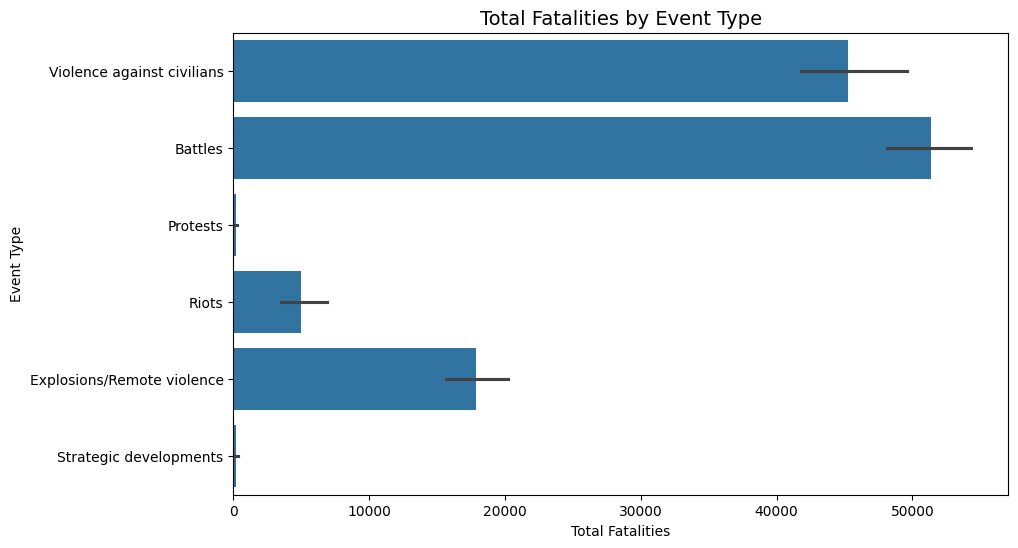

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(y='event_type', x='fatalities', data=df, estimator=sum, order=df['event_type'].value_counts().index)
plt.title('Total Fatalities by Event Type', fontsize=14)
plt.xlabel('Total Fatalities')
plt.ylabel('Event Type')
plt.show()

Violence against civilians and battles are the primary causes of death, accounting for nearly 50,000 fatalities each. Explosions and remote violence contribute significantly to the death toll, reaching around 20,000. Riots, while still violent, result in fewer deaths. Protests and strategic developments have negligible impact on the overall fatality count. This data highlights a severe concentration of violence-driven deaths, primarily due to direct combat and civilian targeting.

In [8]:
fatalities_by_event = df.groupby(['event_type', 'sub_event_type'])[['fatalities']].sum()
fatalities_by_event

fatalities
event_type                 sub_event_type                                 
Battles                    Armed clash                               48557
                           Government regains territory               1968
                           Non-state actor overtakes territory         839
Explosions/Remote violence Air/drone strike                           9492
                           Grenade                                      33
                           Remote explosive/landmine/IED              4403
                           Shelling/artillery/missile attack           356
                           Suicide bomb                               3573
Protests                   Excessive force against protesters          217
                           Peaceful protest                              0
                           Protest with intervention                     0
Riots                      Mob violence                               4030
                           Violent demonstration                       967
Strategic developments     Agreement                                     0
                           Arrests                                       0
                           Change to group/activity                      0
                           Disrupted weapons use                        87
                           Headquarters or base established              0
                           Looting/property destruction                  0
                           Non-violent transfer of territory             0
                           Other                                        83
Violence against civilians Abduction/forced disappearance                0
                           Attack                                    44383
                           Sexual violence                             854

It reveals a disturbing trend of violence-related deaths, with battles and violence against civilians as the primary contributors. Explosions and remote violence also play a significant role, indicating the use of unconventional warfare tactics. Riots account for a lesser number of fatalities, while protests and strategic developments have minimal impact.

Key findings:

1. Direct conflict: Battles and violence against civilians are the most lethal aspects of the conflict, reflecting the intensity of armed clashes and targeting of non-combatants.
2. Unconventional warfare: Explosions and remote violence, particularly air/drone strikes and IEDs, are increasingly used by both government forces and insurgent groups, resulting in significant casualties.
3. Protests and riots: While these events can lead to fatalities, especially when they escalate into violence, they generally account for fewer deaths compared to armed conflict.
4. Strategic developments: Policy or administrative changes have minimal impact on the overall death toll, emphasizing the dominance of active violence.

##  Regional Analysis of Fatalities

The horizontal bar chart depicts the total fatalities by region in Nigeria from 1997 to 2024, revealing stark disparities in violence across the country.

In [62]:
# Group the data by region (admin1) and sum the fatalities
fatalities_by_region = df.groupby('admin1')['fatalities'].sum().reset_index()

# Sort the regions based on the total fatalities
fatalities_by_region = fatalities_by_region.sort_values(by='fatalities', ascending=False)

# Create a Plotly bar plot
fig = px.bar(
    fatalities_by_region,
    x='fatalities',
    y='admin1',
    orientation='h',  # Horizontal bar plot
    labels={'fatalities': 'Total Fatalities', 'admin1': 'Administration Area'},
    title='Total Fatalities by Region in Nigeria (1997-2024)'
)

# Customize the layout
fig.update_layout(
    xaxis_title="Total Fatalities",
    yaxis_title="Administration Area",
    title_x=0.5,  # Center the title
    height=600  # Increase the height for better readability
)

# Show the plot
fig.show()

 Borno stands out dramatically with the highest number of fatalities, likely due to the prolonged Boko Haram insurgency in the northeast. Plateau and Benue follow, reflecting ongoing communal conflicts and farmer-herder clashes in the Middle Belt region. The chart shows a clear concentration of violence in northern and central Nigeria, with others like Yobe, Niger, and Kaduna also heavily affected. Southern areas generally show lower fatality rates, though Delta's relatively high position suggests persistent militancy in the Niger Delta. This distribution highlights the complex, regionalized nature of Nigeria's security challenges, with the northeast bearing the brunt of the violence.

## Civilian Targeting Frequency

In [10]:
fig = px.histogram(df,
                   y='civilian_targeting',
                   title='Frequency of Civilian Targeting in Events',
                   category_orders={'civilian_targeting': df['civilian_targeting'].value_counts().index},
                   labels={'civilian_targeting': 'Civilian Targeting', 'count': 'Count of Events'},
                   orientation='h')
# Show the plot
fig.show()

 This distribution reveals a concerning pattern of violence where civilians are frequently either directly targeted or caught in the crossfire of conflicts. The high number of "Unknown" cases suggests potential underreporting or difficulty in accurately categorizing many violent events. This data underscores the vulnerability of civilians in Nigeria's ongoing conflicts and highlights the need for improved protection mechanisms and more robust reporting systems.

## Analysing number of fatalities recorded throughout the dataset per event group.

In [11]:
# Description of what each numeric code of INTER1 represents
description = {
    1: "State Forces",
    2: "Rebel Groups",
    3: "Political Militias",
    4: "Identity Militias",
    5: "Rioters",
    6: "Protesters",
    7: "Civilians",
    8: "External/Other Forces"
}

fatalities_by_actor_type = df.groupby(['inter1'])[['fatalities']].sum()
fatalities_by_actor_type['actor_type'] = description.values() # Column to match numeric codes with text description
actor_counts = df.groupby('inter1')['actor1'].nunique() # Number of actors in each crime group
fatalities_by_actor_type['No. of Actors'] = actor_counts.values

fig = px.pie(fatalities_by_actor_type, values='fatalities', names='actor_type',
             title='Percentage of Fatalities per Type of Actors in Crimes recorded.',
             hover_data=['No. of Actors'])
fig.update_traces(textinfo='percent+label')
fig.show()

State Forces and Identity Militias are the leading contributors, each responsible for about 30% of fatalities (30.7% and 30.3% respectively). Rebel Groups account for 20.4% of fatalities, while Political Militias are associated with 13.1%. Rioters contribute to 4.04% of fatalities, and External/Other Forces are responsible for 1.3%. Protesters and Civilians contribute minimally, with 0.119% and 0% respectively. This distribution reveals a complex conflict landscape where state actors and non-state armed groups are equally implicated in violence. The significant role of identity-based militias highlights the ethnic and religious dimensions of conflicts in Nigeria. The data suggests that addressing Nigeria's security challenges requires a multifaceted approach, targeting state accountability, inter-communal reconciliation, and the disarmament of various non-state armed groups.

## What are the most occuring disorders

In [67]:
fig = px.histogram(df,
                   y='disorder_type',
                   title='Most commonly occuring disorders',
                   category_orders={'disorder_type': df['disorder_type'].value_counts().index},
                   labels={'disorder_type': 'Different types of Disorders', 'count': 'Count of Events'},
                   orientation='h')
# Show the plot
fig.show()

The chart shows that the most commonly occurring disorder is political violence, followed by demonstrations. Strategic developments and political violence: demonstrations have occurred less frequently.

## Analysis of Crime cases over the years

In [60]:
# Group the data by year and count the number of events per year
events_per_year = df.groupby(['year'])['year'].count()

# Create a Plotly line plot
fig = px.line(
    x=events_per_year.index,
    y=events_per_year.values,
    labels={'x': 'Year', 'y': 'Number of Events'},  # Labels for x and y axes
    title='Rate of Crimes over the Years'
)

# Customize the x-axis ticks to show every 4th year plus the last year
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(events_per_year.index)[::4] + [events_per_year.index[-1]],  # Custom tick intervals
        title_text='Year'  # X-axis label
    ),
    yaxis_title='Number of Events',  # Y-axis label
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()


There was a slight increase in the rate of crimes from 1997 to 2001, followed by a decrease from 2001 to 2004. The rate of crimes then increased steadily from 2004 to 2013, reaching a peak in 2013. From 2013 to 2017, the rate of crimes decreased slightly, but then increased again from 2017 to 2022. The rate of crimes then decreased slightly from 2022 to 2023. But given the year of 2024 has not ended , and we are already eeing such high numbers, the fact that the number of crimes in this year will be even more than that in 2023 is quite concerning

##  Visualizing hotspots of crimes

In [58]:
# Define a threshold for high fatality events to plot separate markers
threshold = 100

# Create the figure with Densitymapbox for general density
fig = go.Figure(go.Densitymapbox(
    lat=df['latitude'],
    lon=df['longitude'],
    z=df['fatalities'],
    radius=15,  # Increase radius for smoother density
    colorscale='Viridis',  # Use a more intuitive colorscale for better readability
    showscale=True,  # Show the scale for color representation
))

# Overlay markers for regions with very high fatalities
high_fatality_areas = df[df['fatalities'] > threshold]
fig.add_trace(go.Scattermapbox(
    lat=high_fatality_areas['latitude'],
    lon=high_fatality_areas['longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=6,  # Increase size for better visibility
        color='red',  # Red markers for high-fatality areas
        opacity=0.5,  # Make the markers fully visible
        symbol='circle'  # Use circle symbol, you can change to 'flag' if needed
    ),
    text=high_fatality_areas['fatalities'],  # Show fatalities on hover

))

# Update the layout with map settings
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": 9.7, "lon": 7.45},  # Keep Nigeria centered
    mapbox_zoom=5,  # Zoom in for a closer view
    title_text="Fatalities in Nigeria Visualized on the Map with High Fatality Markers (In Red)",
    height=700,  # Increase figure height for better clarity
    mapbox_layers=[{
        'source': 'open-street-map',
        'below': 'traces'  # Ensure markers appear on top of the density map
    }]
)

# Show the plot
fig.show()


Key observations:

1. Northeastern concentration: The most intense violence is concentrated in the northeastern region, particularly around Borno State, likely due to the Boko Haram insurgency.
2. North-central conflict zone: Significant conflict activity is evident in the north-central states, associated with farmer-herder conflicts and communal violence.
3. Niger Delta activity: The southern coastal region, especially the Niger Delta, faces notable conflict, possibly linked to militant groups and oil-related violence.
4. Urban centers: Major cities like Lagos, Abuja, and Port Harcourt experience concentrated conflict, suggesting urban violence or terrorism.
5. Northwestern expansion: Conflict is spreading into northwestern states, indicating growing banditry and kidnapping activities.
6. Relative calm in southwest: The southwestern states have comparatively less intense conflict.
7. Border regions: Conflict hotspots are visible near borders, suggesting cross-border dimensions.
8. Varying intensities: The color gradient indicates a wide range of fatality numbers, with some areas experiencing extremely high casualties.

## Crime Severity by Region
This ranks regions by the average severity of crimes (measured by fatalities).

In [70]:
# Group by region (admin1) and calculate the average number of fatalities per event
severity_by_region = df.groupby('admin1')['fatalities'].mean().reset_index(name='average_fatalities')

# Sort by highest average severity
severity_by_region = severity_by_region.sort_values(by='average_fatalities', ascending=False)

# Plotting the data
fig = px.bar(
    severity_by_region,
    x='average_fatalities',
    y='admin1',
    orientation='h',  # Horizontal bar chart
    labels={'average_fatalities': 'Average Fatalities per Event', 'admin1': 'Region'},
    title='Average Crime Severity by Region (1997-2024)'
)

fig.show()


The regions with higher average fatalities per event (Borno, Yobe, Adamawa, Taraba, Kebbi) likely experience more severe forms of criminal activity, such as violent clashes, political unrest, or organized crime. Regions with lower average fatalities per event (Ekiti, Oyo, Edo, Ogun, Jigawa) may have more prevalent property crimes, non-violent offenses, or less deadly forms of violence.